In [1]:
# Solving 3-SAT (NP-Complete) with Grover's Search Quantum Algorithm
# https://community.qiskit.org/textbook/ch-applications/satisfiability-grover.html

import numpy as np

from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance, run_algorithm
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

%matplotlib inline

In [2]:
# Example of Boolean expression:
# (~a | ~b | ~c) & (a | ~b | c) & (a | b | ~c) & (a | ~b | ~c) & (~a | b | c)
input_3sat = input('Boolean expression: ')

Boolean expression: (~a | ~b | ~c) & (a | ~b | c) & (a | b | ~c) & (a | ~b | ~c) & (~a | b | c)


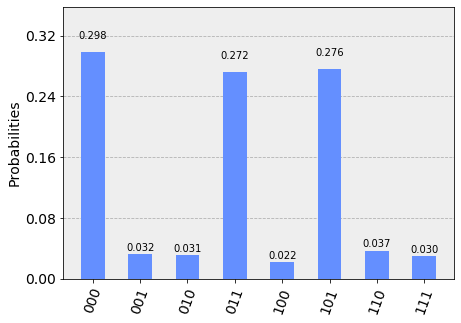

In [3]:
oracle = LogicalExpressionOracle(input_3sat)
grover = Grover(oracle)
simulator = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(simulator, shots = 1024)
result = grover.run(quantum_instance)
plot_histogram(result['measurement'])

In [4]:
oracle._expr

(a | b | ~c) & (a | c | ~b) & (b | c | ~a) & (a | ~b | ~c) & (~a | ~b | ~c)

In [5]:
print('Top result: ', result['result'])
print('Evalutes to:', result['oracle_evaluation'])

Top result:  [-1, -2, -3]
Evalutes to: True


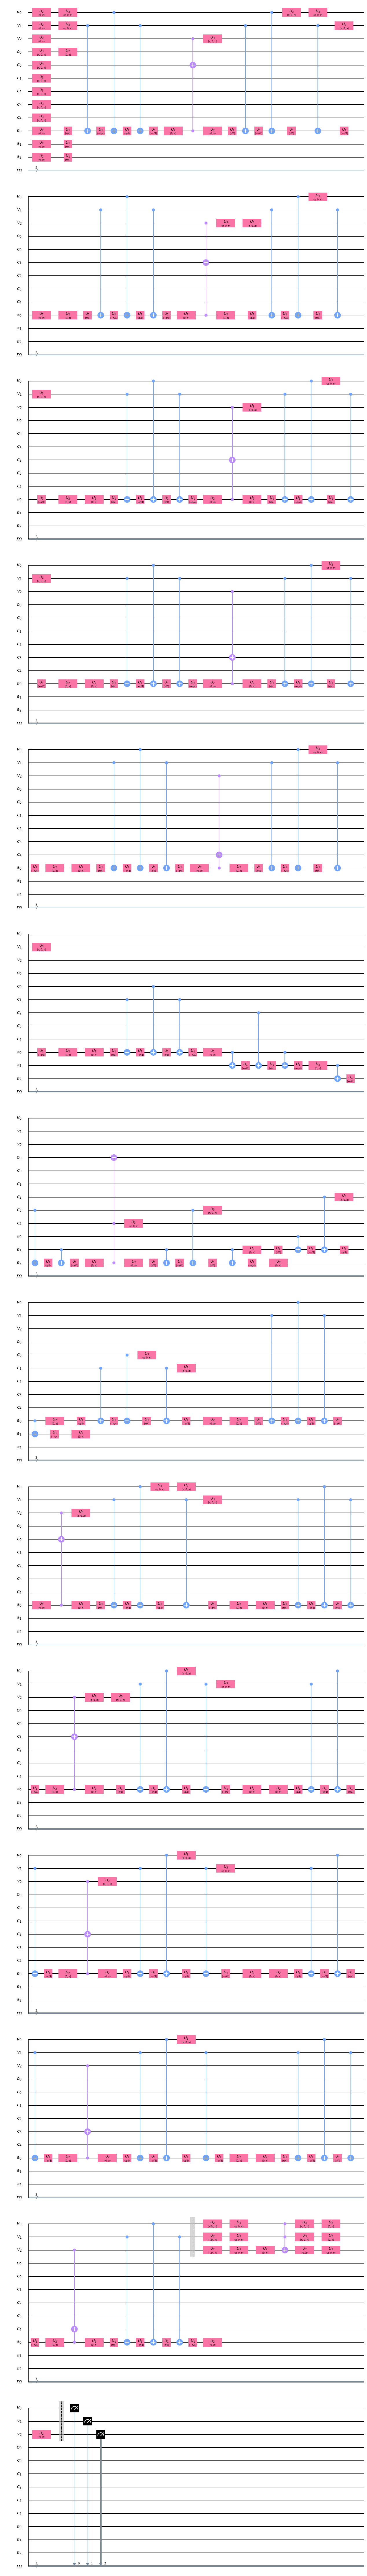

In [6]:
result['circuit'].draw(output='mpl')